In [194]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from qmc.mcmc import metropolis_symmetric, clip_mvnormal_proposal, normal_proposal
from qmc.wavefunction import HarmonicTrialFunction, HydrogenTrialWavefunction
from qmc.distributions import dim2Rosenbrock, MixtureOfGaussians
import arviz as az
import hamiltorch
import numpy as np
%matplotlib inline

In [150]:
tf= HarmonicTrialFunction(torch.ones(1))
n_walkers = 2
num_steps = 2500
init_config = torch.zeros(n_walkers, 1)
results = metropolis_symmetric(tf, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 1)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0
Data variables:
    x        (x_dim_0) float64 40.41


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a773343d0>,
      dtype=object)

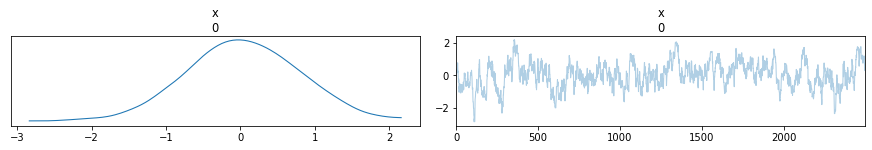

In [151]:
az.plot_trace(dataset)

In [146]:
num_samples = 400
step_size = .9
num_steps_per_sample = 5
params_init = torch.tensor([0.])
tf= HarmonicTrialFunction(torch.ones(1))
n_walkers = 2
init_config = torch.zeros(n_walkers, 1)
results = torch.tensor(hamiltorch.sample(log_prob_func=tf, params_init=params_init,  num_samples=num_samples, step_size=step_size, num_steps_per_sample=num_steps_per_sample))
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))



Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 252.55       
Acceptance Rate 0.90
<xarray.Dataset>
Dimensions:  ()
Data variables:
    x        float64 1.445e+03


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a78493c50>,
      dtype=object)

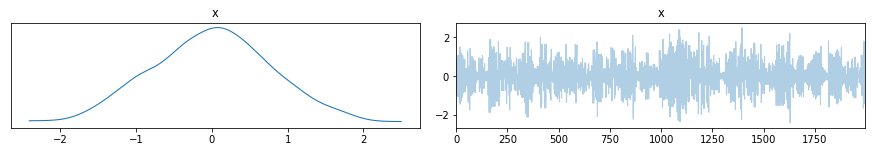

In [147]:
az.plot_trace(dataset)


In [148]:
%timeit metropolis_symmetric(tf, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)

1.28 s ± 139 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [149]:
%timeit hamiltorch.sample(log_prob_func=tf, params_init=params_init,  num_samples=num_samples, step_size=step_size, num_steps_per_sample=num_steps_per_sample)

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 207.20       
Acceptance Rate 0.92
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 224.62       
Acceptance Rate 0.94
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 243.33       
Acceptance Rate 0.92
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | #################### | 400/400 | 279.71       
Acceptance Rate 0.91
Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples | Samples/sec
0d:00:00:01 | 0d:00:00:00 | ###

In [329]:
f = dim2Rosenbrock(torch.tensor(1/20), torch.tensor(100/20))
n_walkers = 1
init_config = torch.ones(n_walkers, 2)
init_config[0] = 0.
results = metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=120000)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 2)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1
Data variables:
    x        (x_dim_0) float64 228.4 114.1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6deb4990>,
      dtype=object)

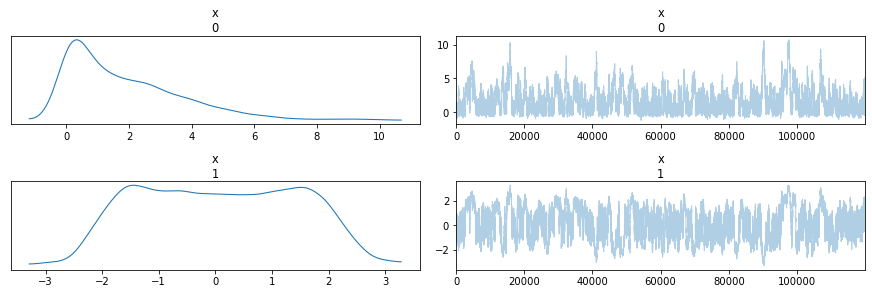

In [330]:
az.plot_trace(dataset)

In [218]:
%timeit metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)

1.35 s ± 288 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [335]:
step_size = 0.2
num_samples = 1200 
L = 60
params_init = torch.ones(2)
params_init[0] = 0.
burn = 200
f = dim2Rosenbrock(torch.tensor(1/20), torch.tensor(100/20))
results = hamiltorch.sample(log_prob_func=f, params_init=params_init, num_samples=num_samples,
                               step_size=step_size, num_steps_per_sample=L,desired_accept_rate=0.75,sampler=hamiltorch.Sampler.HMC_NUTS,burn=burn)
dataset = az.convert_to_dataset(torch.unsqueeze(torch.stack(results),0).numpy())
print(az.ess(dataset))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)      
Invalid log_prob: nan, params: tensor([nan, nan], requires_grad=True)
Inval

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a732694d0>,
      dtype=object)

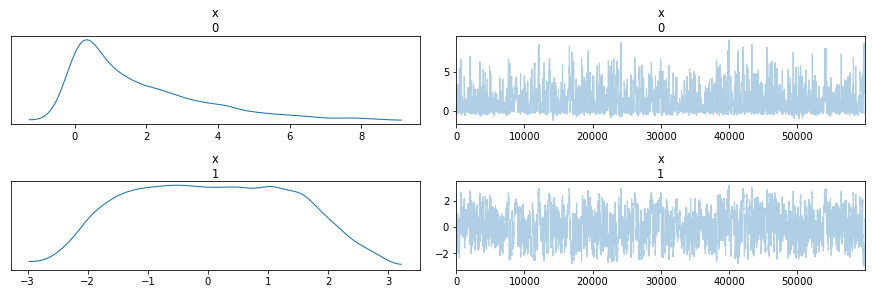

In [336]:
az.plot_trace(dataset)

In [171]:
d = 10
A = torch.randn((d,d))
B = torch.randn((d,d))
C = torch.randn((d,d))
f = MixtureOfGaussians([torch.randn(d), torch.randn(d), torch.randn(d)], 
                       [torch.mm(A, torch.transpose(A,0,1)), torch.mm(B, torch.transpose(B,0,1)), torch.mm(C, torch.transpose(C,0,1)) ])

In [176]:
n_walkers = 1
num_steps = 60000
init_config = torch.ones(n_walkers, d)
init_config[0] = 0
results = metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 10)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    x        (x_dim_0) float64 21.08 11.59 11.89 14.96 ... 38.21 13.55 10.42


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0dcb35cd0>,
      dtype=object)

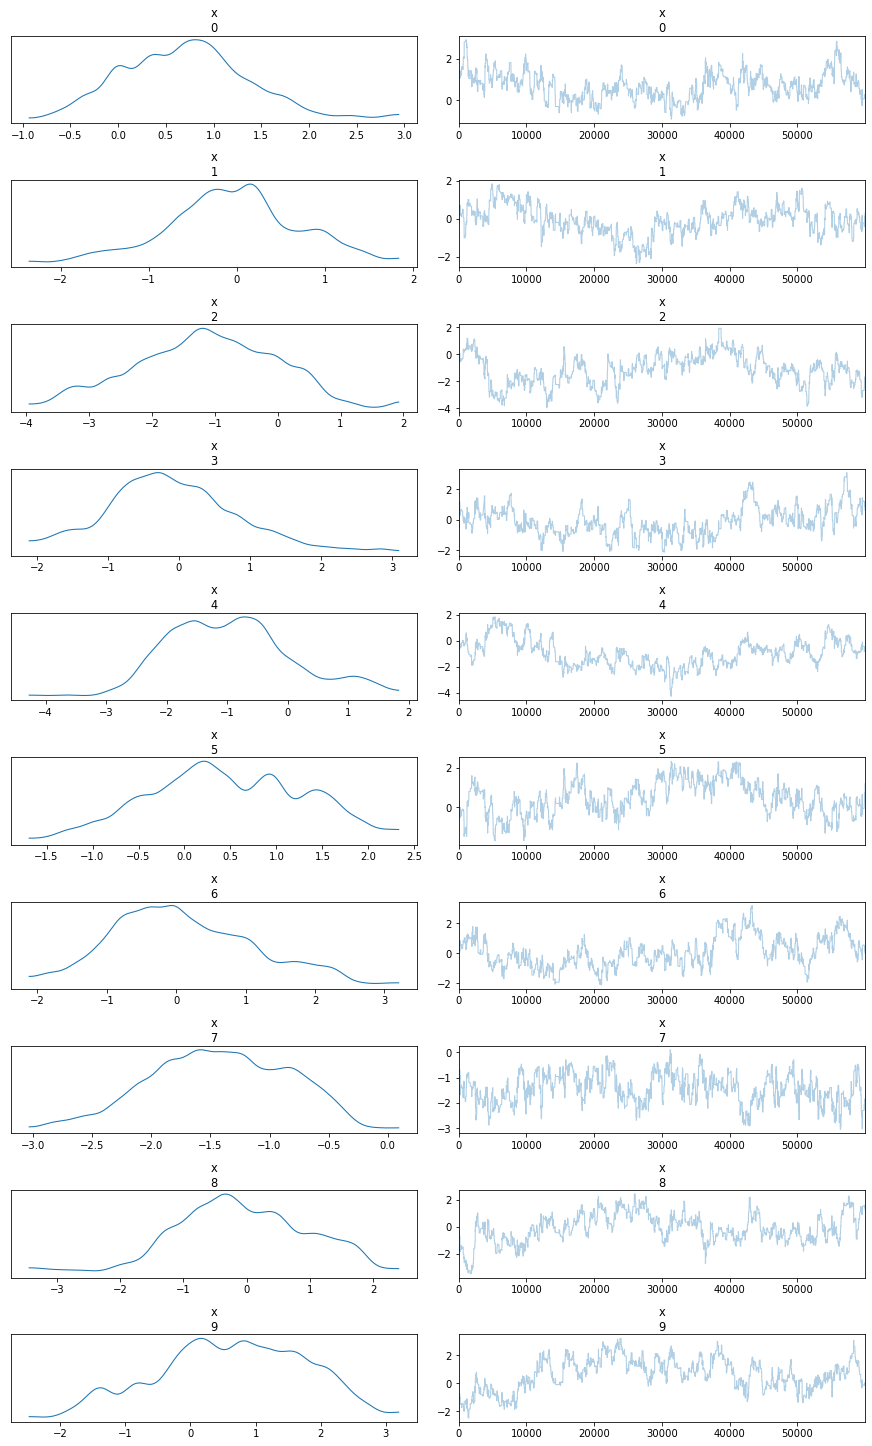

In [177]:
az.plot_trace(dataset)

In [188]:
step_size = .5
num_samples = 1000
L = 50
params_init = torch.ones(d)
params_init[0] = 0.
burn = 20
results = hamiltorch.sample(log_prob_func=f, params_init=params_init, num_samples=num_samples,
                               step_size=step_size, num_steps_per_sample=L,desired_accept_rate=0.75,sampler=hamiltorch.Sampler.HMC_NUTS,burn=burn)
dataset = az.convert_to_dataset(torch.unsqueeze(torch.stack(results),0).numpy())
print(az.ess(dataset))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], requires_grad=True)
Final Adapted Step Size:  0.01569320261478424
0d:00:01:29 | 0d:00:00:00 | #################### | 1000/1000 | 11

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0d11b65d0>,
      dtype=object)

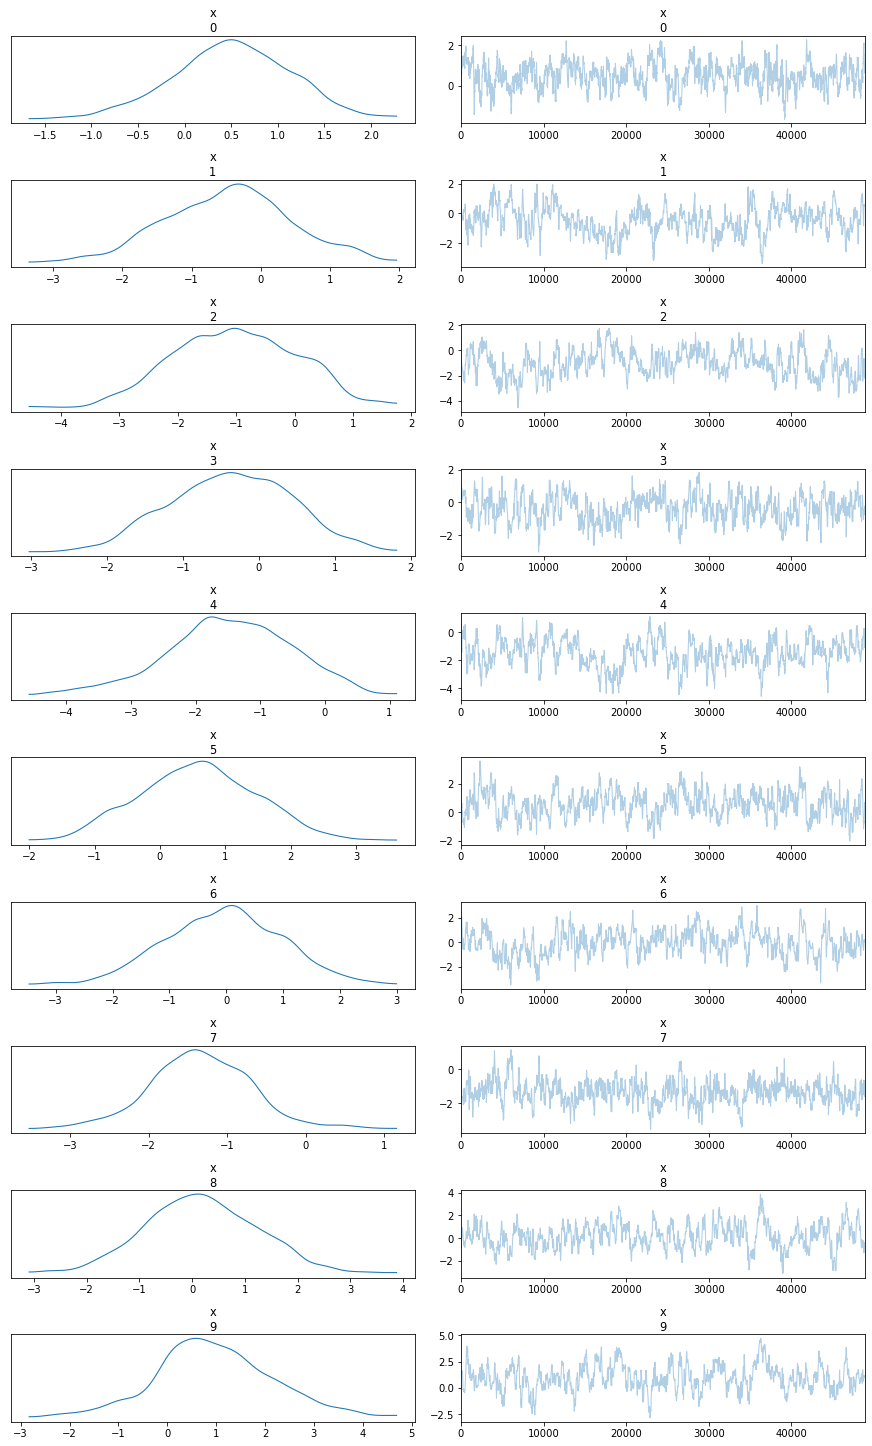

In [189]:
az.plot_trace(dataset)

In [370]:
class Rosenbrock(nn.Module):
    # Rosenbrock(n1,n2) creates the "Hybrid Rosenbrock" from https://arxiv.org/pdf/1903.09556.pdf with parameters a = 1/20, b = 5
    # The dimension is (n1-1)n2 + 1
    def __init__(self, n1, n2):
        super(Rosenbrock, self).__init__()
        self.n1 = n1
        self.n2 = n2
        
    def forward(self, x):
        # output logprob
        dim2 = x.ndimension() > 2
        dim1 = x.ndimension() > 1
        if dim2:
            y = x[:, :, 0]
            x = torch.reshape(x[:, :, 1:], (x.size()[0], x.size()[1], self.n2, self.n1-1))
            xx = x[:, :, :, 1:]
            xxx = x[:, :, :, 0:-1]
            result = - (1/20) * (y -1)**2 
            - 5 * torch.sum(torch.sum((xx - xxx**2)**2, -1), -1)
            
        else:
            x = x if dim1 else x.unsqueeze(0)
            y = x[:, 0]
            x = torch.reshape(x[:, 1:], (x.size()[0], self.n2, self.n1-1))
            xx = x[:, :, 1:]
            xxx = x[:, :, 0:-1]
            result = - (1/20) * (y -1)**2 - 5 * torch.sum(torch.sum((xx - xxx**2)**2,-1), -1)
        return result if dim1 else result.squeeze(0)
    

In [385]:
n1 = 4
n2 = 3
d = (n1 - 1) * n2 +1

In [398]:
n_walkers = 1
num_steps = 150000
init_config = torch.ones(n_walkers, d)
f = Rosenbrock(n1,n2)
results = metropolis_symmetric(f, init_config, normal_proposal, num_walkers=n_walkers, num_steps=num_steps)
dataset = az.convert_to_dataset(results.numpy())
print(az.ess(dataset))

<xarray.Dataset>
Dimensions:  (x_dim_0: 10)
Coordinates:
  * x_dim_0  (x_dim_0) int64 0 1 2 3 4 5 6 7 8 9
Data variables:
    x        (x_dim_0) float64 38.04 57.02 97.73 97.93 ... 22.03 39.16 38.56


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc03d2d3950>,
      dtype=object)

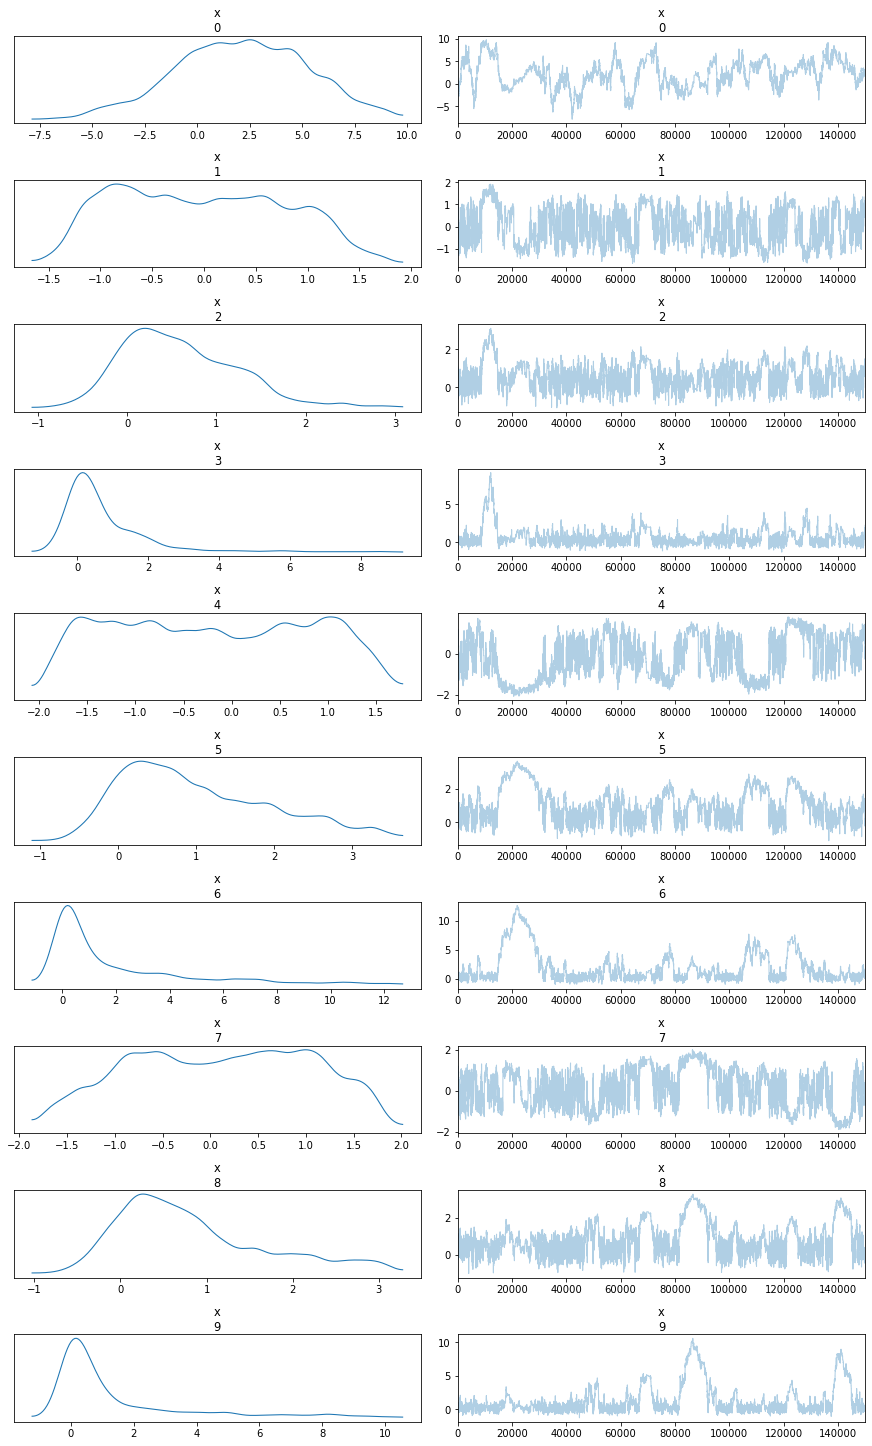

In [399]:
az.plot_trace(dataset)

In [394]:
step_size = 0.2
num_samples = 3000
L = 30
params_init = torch.ones(d)
burn = 200
f = Rosenbrock(n1,n2)
results = hamiltorch.sample(log_prob_func=f, params_init=params_init, num_samples=num_samples,
                               step_size=step_size, num_steps_per_sample=L,desired_accept_rate=0.75,sampler=hamiltorch.Sampler.HMC_NUTS,burn=burn)
dataset = az.convert_to_dataset(torch.unsqueeze(torch.stack(results),0).numpy())
print(az.ess(dataset))

Sampling (Sampler.HMC; Integrator.IMPLICIT)
Time spent  | Time remain.| Progress             | Samples   | Samples/sec
Invalid log_prob: nan, params: tensor([-3.0643,     nan,     nan,     nan,     nan,     nan,     nan, -0.8056,
         0.5768,  0.2900], requires_grad=True)
Invalid log_prob: nan, params: tensor([2.0916,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
           nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([-1.1338,     nan,     nan,     nan,  0.1246,  0.3839,  0.0117,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 1.5329,     nan,     nan,     nan,     nan,     nan,     nan, -0.4073,
         0.6740,  1.5488], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 1.1908,     nan,     nan,     nan,  2.9934, -0.5031,  2.8750, -0.1750,
         0.2422,  0.1772], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 4.5002, -0.3332,  0.0757,  0.8086,     nan,     nan,     nan,

Invalid log_prob: nan, params: tensor([-0.2711,  0.9196,  1.1930,  1.9958, -0.6989,  0.4323,  0.3738,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 1.7318,  0.7711,  0.7662,  0.7889, -1.3079,  1.8723,  3.0393,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 2.9443,  1.3557,  2.1429,  4.6217, -1.3406,  1.3723,  2.1412,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([-0.1277,  0.6808,  0.5735,  0.2968, -1.3231,  2.0108,  4.6713,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([4.1266, 0.8922, 0.8508, 1.0680, 0.8226, 0.9226, 0.5843,    nan,    nan,
           nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([-1.2354,  0.7941,  0.9308,  0.8776, -1.3243,  1.7114,  2.5726,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 0.4560,  1.3798,  1.60

Invalid log_prob: nan, params: tensor([ 6.0681,  1.3998,  1.7777,  2.8671, -1.3279,  2.3621,  5.1473,     nan,
            nan,     nan], requires_grad=True)
Invalid log_prob: -inf, params: tensor([4.6908e+00, 7.0610e+17,        inf, 8.3061e+24, 1.1269e+00, 1.5305e+00,
        2.6061e+00, 1.0300e-01, 1.8724e-01, 2.6361e-01], requires_grad=True)
Invalid log_prob: nan, params: tensor([ 4.1976,     nan,     nan,     nan,  1.1437,  1.0253,  1.2202,  0.4579,
         0.4194, -0.0521], requires_grad=True)
Invalid log_prob: nan, params: tensor([3.3473,    inf,   -inf,    inf, 0.1769, 0.3552, 0.2026, 1.2365, 1.4802,
        2.1371], requires_grad=True)
Invalid log_prob: -inf, params: tensor([ 5.2685e+00, -2.5502e+04,  6.0675e+10,  4.4010e+06, -2.0525e-01,
        -7.4154e-02, -5.2235e-01,  4.7129e-01,  1.0137e-01,  2.8058e-01],
       requires_grad=True)
Invalid log_prob: nan, params: tensor([ 2.9615,     nan,     nan,     nan, -0.8007,  0.8688,  0.6382,  1.2453,
         1.2934,  1.9047], req

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0507d9fd0>,
      dtype=object)

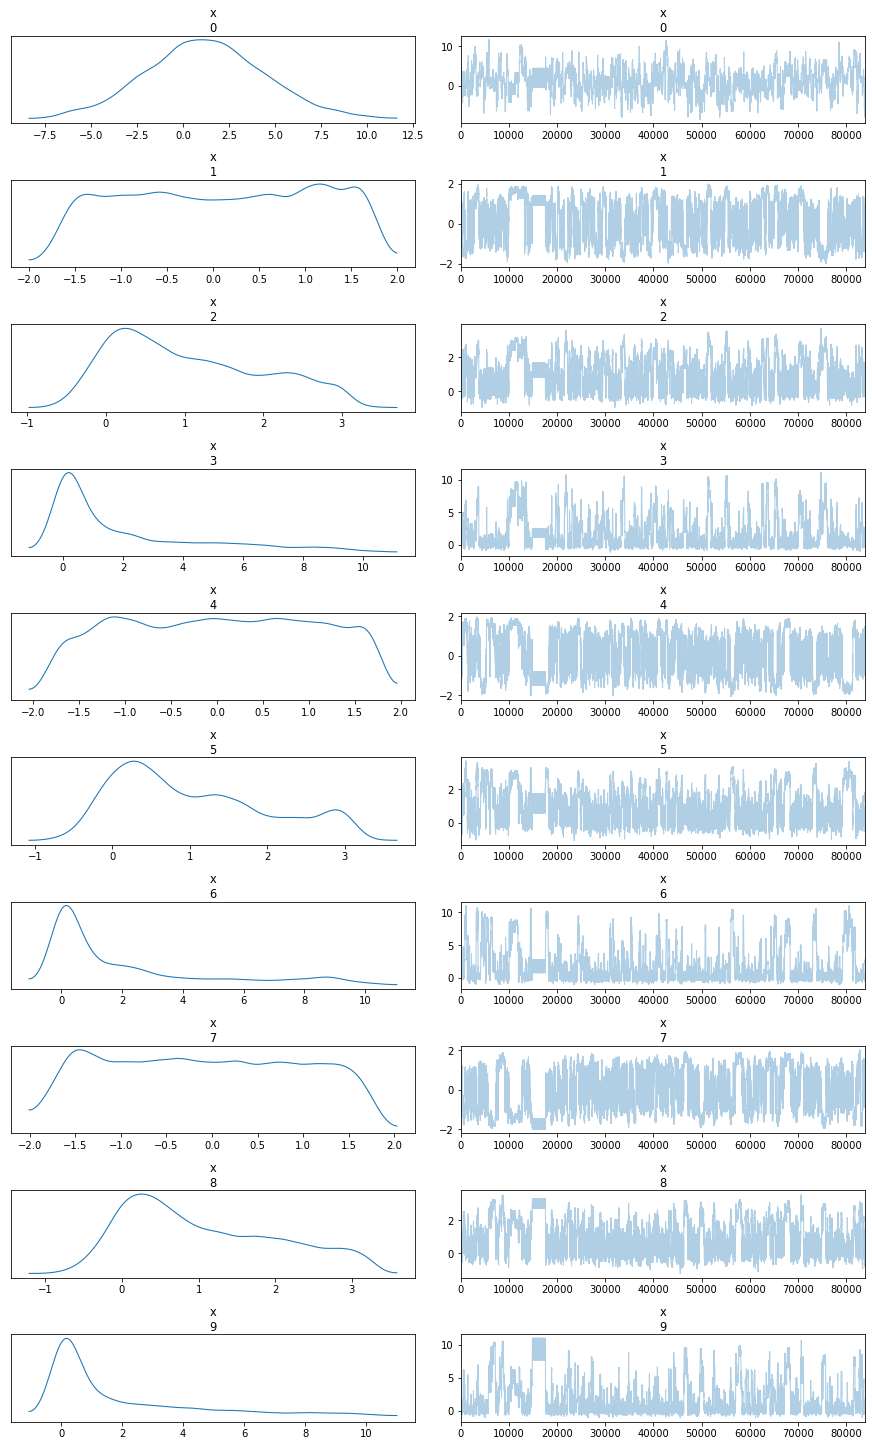

In [395]:
az.plot_trace(dataset)